## HW 9 Geospatial and 2D Data Analysis 

- Geospatial Mapping 
- 2-D visualization
- netcdf files
- Q&A: Team or email

### 1. Male-to-Female Ratio in Hong Kong [20%]

Now let's try generate a choropleth map showing distributions of quantitative data in a distric map of Hong Kong. Again choose your favorite colormap (the cmap option, see full documentatin here: https://matplotlib.org/tutorials/colors/colormaps.html)

The geospatial data file is "Hong_Kong_18_Districts.geojson", which contains geometric informations (geojson) of the 18 district of Hong Kong. Similar to the "world" geopandas dataframe containing all the geometry information for the countries over the world. But unlike the "world" geopandas dataframe which is built in, this is an external geopandas data file, so you need to read it into Python using a geopandas function. Use the following geopandas code (pay attention to your file directory) to load the geometry information for geospatial plotting:

    hk_map = gpd.read_file('Hong_Kong_18_Districts.geojson')

After calling the .read_file( ) function, hk_map is a geopandas dataframe (similar to the "world" geopandas data frame you've worked on)

- given the "HK_18dist.xlsx" data file, use the dataframe merge method to make a choropleth map showing the male-to-female population ratio using the 'OrRd' colormap. Put a legend in your figure, label/title your figure properly.

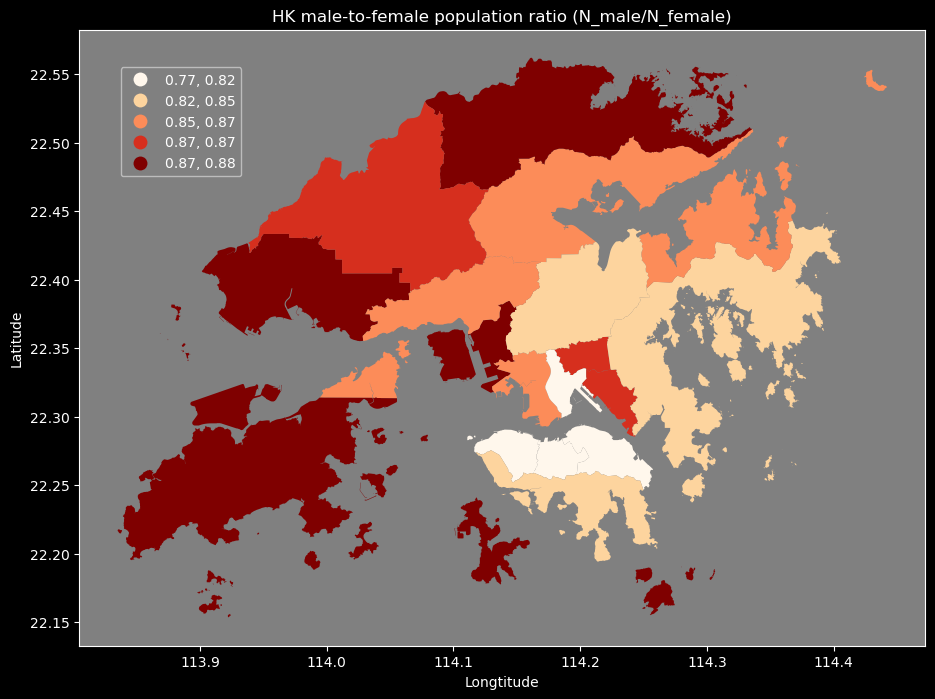

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import geopandas as gpd
import mapclassify.classifiers as classifiers

import warnings 
warnings.filterwarnings("ignore") # ignore warning messages

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm

# BUG 1: conda doesn't have a compatible library for geopandas and fiona
# ---> use pip to install

# BUG 2: HK_18dist need to be decoded as "utf-8" file 
# ---> resave it as utf-8 .csv file

# BUG 3: we could only rename dataframe's column name, instead of geodatafram's.

# BUG 4: merge df into geodataframe -- type need to be geodataframe

hk_map = gpd.read_file("Hong_Kong_18_Districts.geojson")
hk_map.set_index("OBJECTID", inplace=True)
hk_popu = pd.read_csv("./HK_18dist.csv")
hk_popu.set_index("District", inplace=True)

# step 1: rename
hk_popu.rename(columns={"Chinese":"TCNAME"},inplace=True)

# step 2: merge(on=,how=)
dmerge = hk_map.merge(hk_popu,on="TCNAME",how="inner")
dmerge["Ratio"] = dmerge["Male"]/dmerge["Female"]

# step 3: plot the image
plt.rcParams['axes.facecolor'] = 'gray'
ax = dmerge.plot(figsize=(12,8), column="Ratio", cmap="OrRd", scheme="quantiles", legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((-0.05,0.55,0.25,0.4))
# TIP: don't need to add this code ---> adjust automatically

ax.set_title("HK male-to-female population ratio (N_male/N_female)")
ax.set_xlabel("Longtitude")
ax.set_ylabel("Latitude")

plt.show()



### 2. Obesity in the US, by county and states [40%]

Obesity has truly become a worldwide problem, affecting countries rich and poor. So just how many men, women, and children are overweight or obese? It’s a natural question-and a surprisingly hard one for researchers to answer. The problem’s vast. The data, from some regions, quite spotty. So projections from one group differ a bit from the estimates of another. But all point to tremendous increases in global obesity rates over the past three decades-and find that the epidemic shows no signs of abating without dedicated efforts to combat it (source: Harvard Medical School).

Let's focus on the obesity data files from the US CDC on 2008 (I don't have the most recent data..) to generate visualization and analysis for the obesity problem in the Stats - you've already learned how bad it is in the in-class practice.

First let's generate a map for the US colored by the GDP per capita data:
- load the data file 'us_states.geojason' using geopandas in to a geopandas dataframe, take a look at the  dataframe
- create a new column named "gdp_per_cap" which is the GDP per capita for each state (use the "gdp" and "opulation" columns"
- generate a color map with the gdp_per_cap column data for the US

Then let's generate another map for the Obesity data based on county: 
- load the data file 'county.geo.json' using geopandas in to a **geopandas** dataframe, take a look at the  dataframe (the data file is large since it contains all the geometric information of US counties) 
- drop the data for Alaska and Hawaii based on the "state" column (state=='AK' and state=='HI'). Doesn't mean we don't like these states, just make the map more readable..
- the column 'NAMELSAD10' is the name of each county, change the column name to 'county_name'
- load the obesity data file "2008_estimated_obesity_by_us_county.csv" in to a **pandas** data frame
- now merge the pandas dataframe into the geopandas dataframe based on the column "county_name"
- generate a colored map for the column "age_adjusted_percent", using the "jet" colormap, this is the distribution of the obesity in the States

-- task 1 --


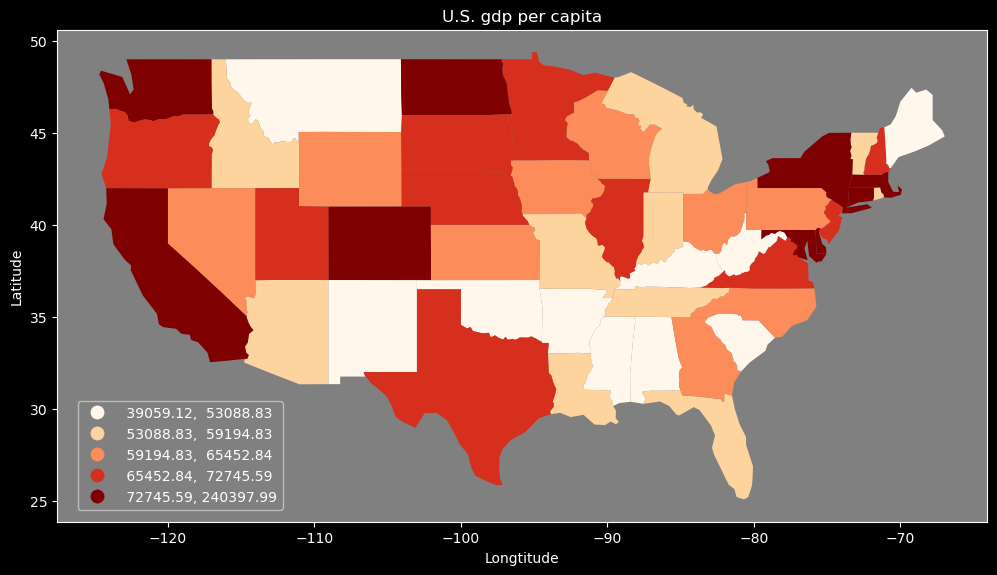

-- task 2 --


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import geopandas as gpd
import mapclassify.classifiers as classifiers

import warnings 
warnings.filterwarnings("ignore") # ignore warning messages

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm


# -- task 1 --
print("-- task 1 --")
us_map = gpd.read_file("./us_states.geojason")
us_map["gdp_per_cap"] = us_map["gdp"]/us_map["population"]
plt.rcParams['axes.facecolor'] = 'gray'
ax = us_map.plot(figsize=(12,8), column="gdp_per_cap", cmap="OrRd", scheme="quantiles", legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.,-0.14,0.25,0.4))
ax.set_title("U.S. gdp per capita")
ax.set_xlabel("Longtitude")
ax.set_ylabel("Latitude")
plt.show()


# -- task 2 --
print("-- task 2 --")
county_map = gpd.read_file("./county.geo.json")
county_map = county_map[(county_map["state"]!="AK") & (county_map["state"]!="HI")]
# county_map.rename({"NAMELSAD10":"county_name"},inplace=True)
# BUG: we could not rename a column in datatype of geodatafram
county_map["county_name"] = county_map["NAMELSAD10"]
obesity = pd.read_csv("./2008_estimated_obesity_by_us_county.csv")
#print(county_map.head())
#print(obesity.head())
dmerge = county_map.merge(obesity, on="county_name",how="inner")

plt.rcParams['axes.facecolor'] = 'gray'
ax = dmerge.plot(figsize=(12,8), column="age_adjusted_percent", cmap="jet", scheme="quantiles", legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.,-0.14,0.25,0.4))
# TIP: don't need to add this code ---> adjust automatically

ax.set_title("Distribution of obesity in U.S.")
ax.set_xlabel("Longtitude")
ax.set_ylabel("Latitude")

plt.show()



### 3. IGRF field and Magnetic Equator [20%]

In 1600, William Gilbert hypothesized that the Earth itself was a giant bar magnetic and that this gave rise to the Earth's **magnetic field**!  If it were true - that the source of the magnetic field behaved like a giant bar magnet - then the **inclination** of the **magnetic field** would only vary as a function of latitude. 

**Inclination** is the angle between the horizontal and the direction of the field. If the field were generated by a bar magnet, then the **inclination** would be horizontal (0 $^\circ$) at the equator and vertical ($\pm 90 ^\circ$) at the North and South poles. The geographic location where the inclination is zero is called the **Magnetic Equator**
   
Let's Use the function **magMap( )** based on the IGRF module to evaluate the actual inclination (that is the "Is" array in the lecture notes) of IGRF for the year 2000.

- download the **mkigrf** module from moodle and import into Python (make sure that the module is in the same directory as your ipynb file)
- call the magMap( ) function, e.g.:
    
        Ds,Is,Bs,lons,lats=magMap(date,lon_0=0)
  where "date" is basically the year of the IGRF model
    
- Use **meshgrid( )** to make a 2-D array of the latitudes and longitudes that were returned from **magMap( )** (the function is given in the following code cell, which is based on the mkigrf module)
- generate a global map (PlateCarree, Orthogrophic, Robinson, etc., your choice)
- then use contourf() to make a color plot of the actual inclination on top of your global map projection
- in the same map, show the magnetic equator by finding the zero inclination contour ($Is = 0$)

In [ ]:
import mkigrf 
import numpy as np

def magMap(date,**kwargs):
    """
    generates the data for a map of the magnetic field. 
    Inputs: 
    required: 
        date = decimal year for evaluation (between 1900 and 2020)
    optional: 
        lon_0 = desired zero longitude
    
    Returns: 
    
    Bdec = declinations
    Binc = inclinations
    B = field strength (in microtesla)
    lons = array of longitudes
    lats = array of latitudes

    """
    if 'lon_0' in kwargs.keys(): # check if there are keyword arguments
        lon_0=kwargs['lon_0'] # if lon_0 is set, use that one
    else: # otherwise..... 
        lon_0=0. # set the default lon_0 to 0. 
    
    incr=10 # we can vary to the resolution of the model
    lonmax=(lon_0+180.)%360+incr # get some parameters for our arrays of lat/lon
    lonmin=(lon_0-180.)
    latmax=90+incr
    lons=np.arange(lonmin,lonmax,incr) # make a 1D array of longitudes (like elons)
    lats=np.arange(-90,latmax,incr)# make a 1D array of longitudes (like elats)
    
    
    # set up some containers for the field elements
    lenLats, lenLons = len(lats), len(lons)
    B=np.zeros((lenLats,lenLons))
    Binc=np.zeros((lenLats,lenLons))
    Bdec=np.zeros((lenLats,lenLons))
    Brad=np.zeros((lenLats,lenLons))
    
    for j in range(lenLats): # step through the latitudes
        for i in range(lenLons): # and the longitudes
            x,y,z,f=mkigrf.doigrf(lons[i],lats[j],date)  # get the field elements
            Dec,Inc,Int=mkigrf.cart2dir(x,y,z) # turn them into polar coordites
            B[j][i]=Int*1e-3 # convert the string to microtesla (from nT)
            Binc[j][i]=Inc # store the inclination value
            Bdec[j][i]=Dec # store the declination value
    return Bdec,Binc,B,lons,lats # return the arrays.  

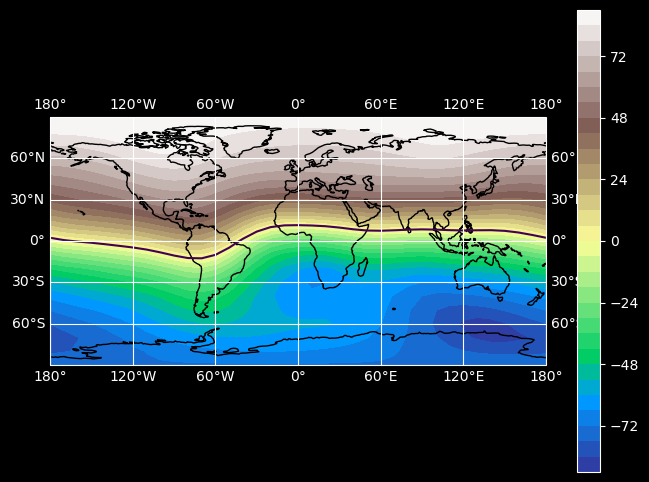

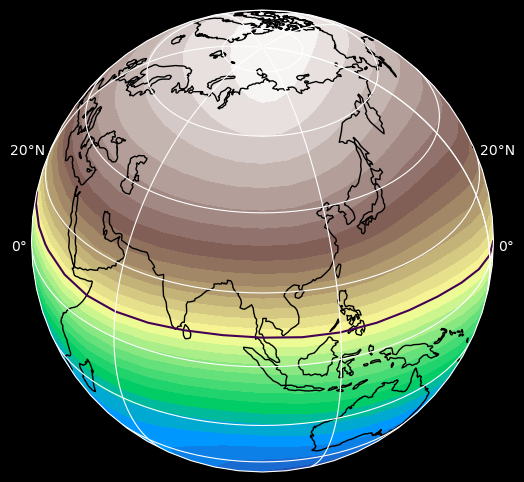

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
# BUG 1: plt.contour就是绘制等高线的值！！！
# 不需要自己再来判断哪些值符合标准啦！！！

# BUG 2: contourf会覆盖原图上的图形
# 需要在绘制完contourf之后再重新画一遍coastline呢！！！

Ds, Is, Bs, lons, lats = magMap(2000,lon_0=0)

plt.figure(figsize=(8,6))
plt.rcParams['axes.facecolor'] = 'gray'
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.coastlines(resolution="110m")
ax.gridlines(draw_labels = True)
xx, yy = np.meshgrid(lons,lats)
fig = plt.contourf(xx, yy, Is, 30,cmap='terrain',transform=ccrs.PlateCarree())
fig1 = ax.contour(xx, yy, Is, levels=[0],transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

plt.figure(figsize=(8,6))
plt.rcParams['axes.facecolor'] = 'gray'
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=33, central_longitude=100))
ax.coastlines()
ax.coastlines(resolution="110m")
ax.gridlines(draw_labels = True)
ax.stock_img()
xx, yy = np.meshgrid(lons,lats)
fig1 = ax.contour(xx, yy, Is, levels=[0],transform=ccrs.PlateCarree())
# 等高线的值分别是什么，此时只绘制 0 这一条等高线
fig = ax.contourf(xx, yy, Is, 30, cmap='terrain',transform=ccrs.PlateCarree())
# 等高线的数量 30
ax.coastlines()
plt.show()



### 4. Global humidity distribution from WACCM data [20%]

The Whole Atmosphere Community Climate Model (WACCM) is a comprehensive numerical model, spanning the range of altitude from the Earth's surface to the thermosphere (~ 120 km altitude). The WACCM code is now being run in real-time, driven by meteorological forecasts from NASA/GMAO GEOS-5. The model results are open for research and teaching, available at https://www.acom.ucar.edu/waccm/download.shtml. Let's use try the WACCM model output (netcdf files) for visualization of the Earth's surface humidity.

- First download the data file "waccm-data-20230101.nc" from the Moodle page.
- The netcdf files are a very popular type of climate model output data, to read netcdf files, we use the xarray module, for example: 

        import xarray as xr
    Now use the .open_dataset() function to load the data into an xarray object:
        ds3 = xr.open_dataset('waccm-data-20230101.nc')
    here ds3 is an object for the netcdf file (it's like a data frame but not based on pandas)
- type "ds3" in a code cell and take a look at the output
- the latitude and longitude arrays (1-D) are **ds3.lat** and **ds3.lon** (similar to the elons, elats arrays used as examples in Lecture 20)
- use the **meshgrid()** function to generate a 2-D mesh using the 1-D lat and lon arrays for color plotting, pay attention to the shap of the 2D lat-lon mesh arrays
- the humidity data is **ds3.Q**, to access the humidity at the surface, we need only one altitude level of the 4-D xarray, which is the last index of the second dimension, using this: **humidity = ds3.Q[0,-1,:,:]**, this is basically a 2-D slice of the humidity data array, which is the lat-lon distribution of the surface humidity
- Generate a global map projection use Cartopy, e.g., plateCarree projection.
- now use either the .pcolor() or .contourf() function to visualize the specific humidity at the surface of the Earth, together with your map projection. Conclude your plot.

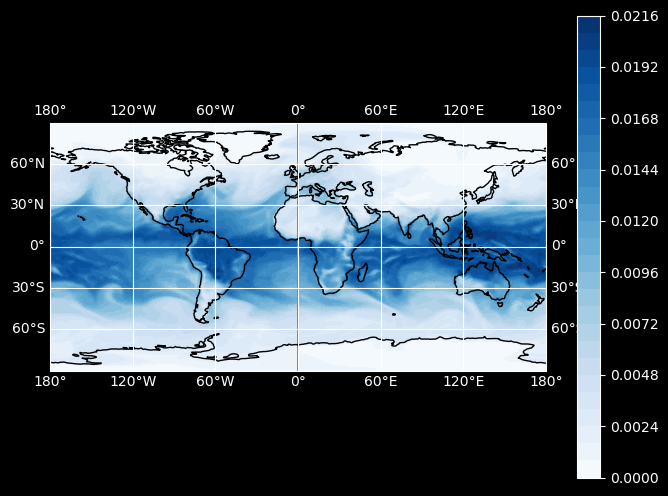


I used colormap of "Blues", whose color becomes deeper blue when value is larger.
1. The image indicates that land posseses less humidity than ocean's.
2. The majority humidity surrounds equtator and two poles has the leaset humidity.
3. When latitude becomes larger or smaller (begining at 0), the humidity will 
    decline generally.




In [ ]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import warnings 
warnings.filterwarnings("ignore") # ignore warning messages

ds3 = xr.open_dataset('./waccm-data-20230101.nc')
longtitude = ds3.lon
latitude = ds3.lat

xx, yy = np.meshgrid(longtitude, latitude)
# shape: (latitude, longtitude)，先用于创建的在后面
humidity = ds3.Q[0,-1,:,:]

plt.figure(figsize=(8,6))
plt.rcParams['axes.facecolor'] = 'gray'
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.coastlines(resolution="110m")
ax.gridlines(draw_labels = True)
fig = plt.contourf(xx, yy, humidity, 30,cmap='Blues',transform=ccrs.PlateCarree())
#fig = plt.pcolor(xx, yy, humidity, cmap='terrain',transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

"""
"terrain"颜色映射通常以低值为蓝色（表示海洋或低地），中间值为绿色（表示平原或山地），
高值为棕色或黄色（表示高山或岩石）。
这种颜色映射可以帮助我们直观地观察和分析地形或地貌数据，
使得低地、平原、山地和高山之间的变化更加明显。
"""

Conclude = """
I used colormap of "Blues", whose color becomes deeper blue when value is larger.
1. The image indicates that land posseses less humidity than ocean's.
2. The majority humidity surrounds equtator and two poles has the leaset humidity.
3. When latitude becomes larger or smaller (begining at 0), the humidity will 
    decline generally.

"""
print(Conclude)
